In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [ ]:
# Read the CSV file into a pandas dataframe
df = pd.read_csv("/content/DOC-20240225-WA0001.csv")
df.head(5)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401,54.151139,30156308,28,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1.670799e+09,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401,768.024839,30202938,25,Won,W,41.0,0.80,1210.0,104991,1.668702e+09,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401,386.127949,30153963,30,Won,WI,28.0,0.38,952.0,S0380700,6.283770e+05,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401,202.411065,30349574,32,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1.668702e+09,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401,785.526262,30211560,28,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,6.406650e+05,20210301.0,577.00


In [ ]:
print(len(df['item_date'].unique())) #
print(len(df['customer'].unique())) #
print(len(df['material_ref'].unique()))
print(len(df['product_ref'].unique())) #
print(len(df['delivery date'].unique())) #

28
728
6246
30
20


In [ ]:
df.shape

(26052, 14)

In [ ]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

id                   1
item_date            0
quantity tons        0
customer             0
country              0
status               0
item type            1
application          1
thickness            1
width                1
material_ref     11374
product_ref          1
delivery date        1
selling_price        1
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             26051 non-null  object 
 1   item_date      26052 non-null  int64  
 2   quantity tons  26052 non-null  float64
 3   customer       26052 non-null  int64  
 4   country        26052 non-null  int64  
 5   status         26052 non-null  object 
 6   item type      26051 non-null  object 
 7   application    26051 non-null  float64
 8   thickness      26051 non-null  float64
 9   width          26051 non-null  float64
 10  material_ref   14678 non-null  object 
 11  product_ref    26051 non-null  float64
 12  delivery date  26051 non-null  float64
 13  selling_price  26051 non-null  float64
dtypes: float64(7), int64(3), object(4)
memory usage: 2.8+ MB


In [ ]:
#Dealing with data in wrong format
# dealing with data in wrong format
# for categorical variables, this step is ignored
# df = df[df['status'].isin(['Won', 'Lost'])]
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [ ]:
#Nan values and shape after dealing with data in wrong format
missing_values_count = df.isnull().sum()
print(missing_values_count)
print(df.shape)
df.info()

id                   1
item_date            1
quantity tons        0
customer             0
country              0
status               0
item type            1
application          1
thickness            1
width                1
material_ref     11374
product_ref          1
delivery date        2
selling_price        1
dtype: int64
(26052, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             26051 non-null  object 
 1   item_date      26051 non-null  object 
 2   quantity tons  26052 non-null  float64
 3   customer       26052 non-null  int64  
 4   country        26052 non-null  int64  
 5   status         26052 non-null  object 
 6   item type      26051 non-null  object 
 7   application    26051 non-null  float64
 8   thickness      26051 non-null  float64
 9   width          26051 non-null  float64
 10  material_re

In [ ]:
#Dealing with Missing Values
# material_ref has large set of null values, so replacing them with unknown
df['material_ref'].fillna('unknown', inplace=True)
# deleting the remaining null values as they are less than 1% of data which can be neglected
df = df.dropna()

In [ ]:
missing_values_count = df.isnull().sum()
print(missing_values_count)
print(df.shape)

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64
(26048, 14)


In [ ]:
df_p=df.copy()

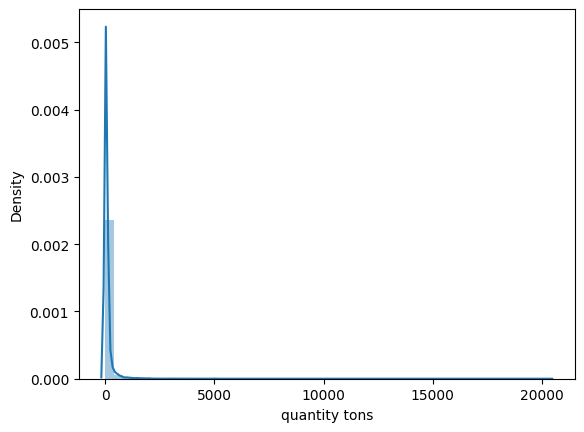

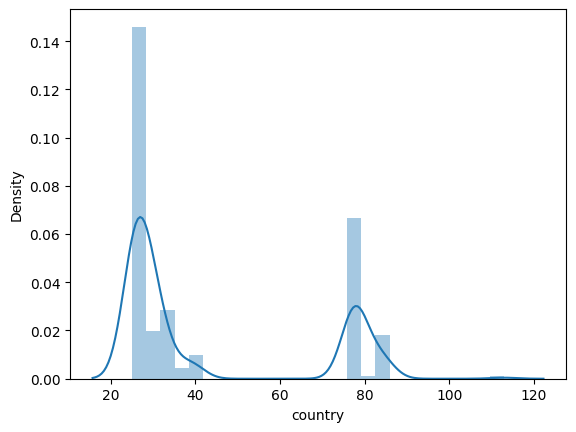

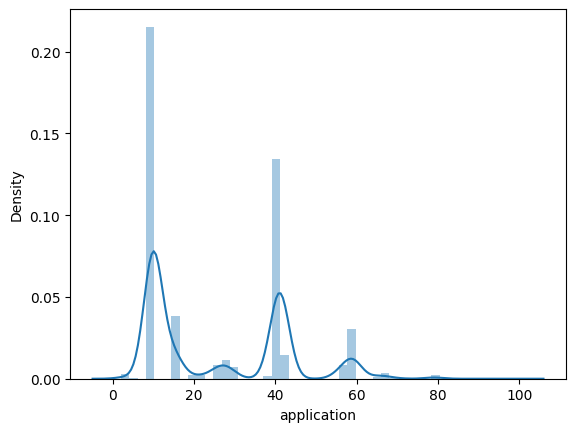

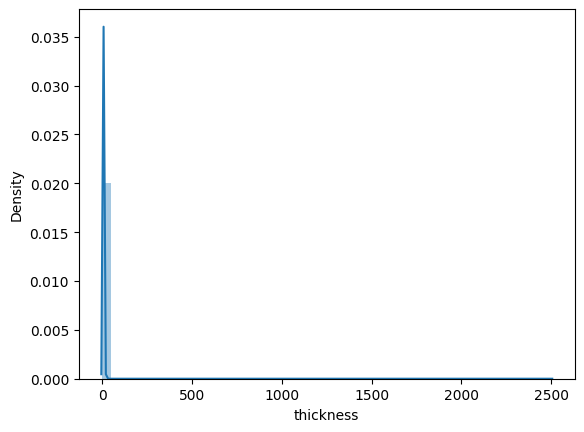

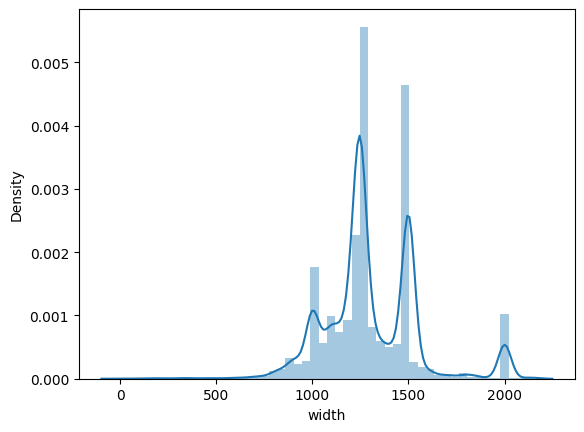

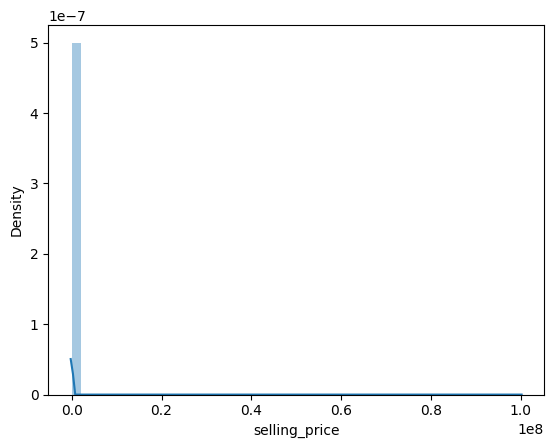

In [ ]:
#PLOTTING

# ['quantity tons','selling_price','application','thickness','width', 'country']
# ['status','item type']

df_p['quantity tons']   # skewed
df_p['country']
df_p['application']
df_p['thickness']       # skewed
df_p['width']
df_p['selling_price']   # skewed

import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df_p['quantity tons'])
plt.show()
sns.distplot(df_p['country'])
plt.show()
sns.distplot(df_p['application'])
plt.show()
sns.distplot(df_p['thickness'])
plt.show()
sns.distplot(df_p['width'])
plt.show()
sns.distplot(df_p['selling_price'])
plt.show()

In [17]:
import numpy as np
mask1 = df_p['selling_price'] <= 0
print(mask1.sum())
df_p.loc[mask1, 'selling_price'] = np.nan

mask1 = df_p['quantity tons'] <= 0
print(mask1.sum())
df_p.loc[mask1, 'quantity tons'] = np.nan

mask1 = df_p['thickness'] <= 0
print(mask1.sum())

2
0
0


In [18]:
df_p.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    2
dtype: int64

In [19]:
df_p.dropna(inplace=True)
len(df_p)

26046

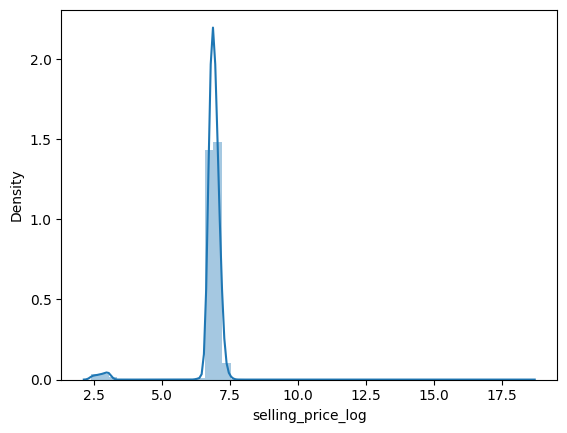

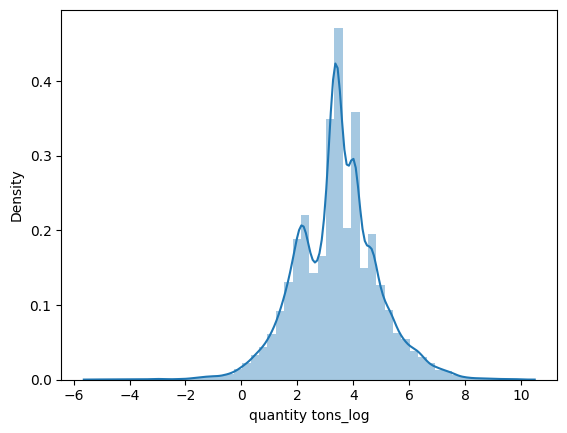

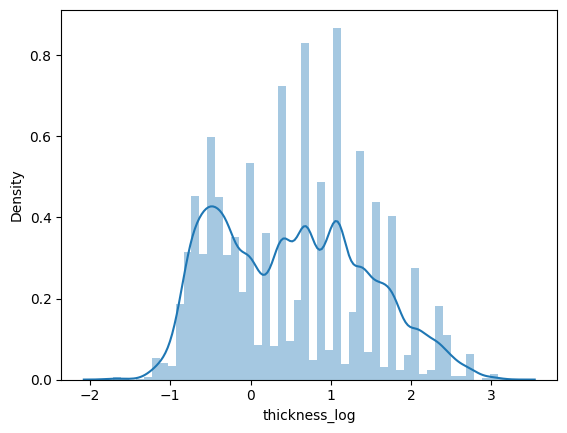

In [20]:
import numpy as np
df_p['selling_price_log'] = np.log(df_p['selling_price'])
sns.distplot(df_p['selling_price_log'])
plt.show()

df_p['quantity tons_log'] = np.log(df_p['quantity tons'])
sns.distplot(df_p['quantity tons_log'])
plt.show()

df_p['thickness_log'] = np.log(df_p['thickness'])
sns.distplot(df_p['thickness_log'])
plt.show()
# reverts log
# df_p['reverted_values'] = np.exp(df_p['selling_price_log'])
# sns.distplot(df_p['reverted_values'])
# plt.show()

In [21]:
df_p.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308,28,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1.670799e+09,2021-07-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938,25,Won,W,41.0,0.80,1210.0,104991,1.668702e+09,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963,30,Won,WI,28.0,0.38,952.0,S0380700,6.283770e+05,2021-01-01,644.33,6.468211,5.956169,-0.967584
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574,32,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1.668702e+09,2021-01-01,768.00,6.643790,5.310301,0.832909
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560,28,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,6.406650e+05,2021-03-01,577.00,6.357842,6.666354,1.386294


In [22]:
x=df_p[['quantity tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()

<Axes: >

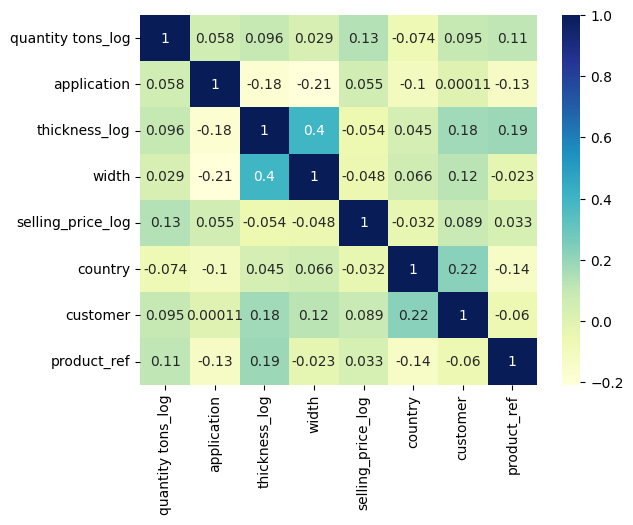

In [23]:
sns.heatmap(x, annot=True, cmap="YlGnBu")

In [24]:
# DECISION TREE REGRESSOR
# 1 Encode categorical features
# 2 Test and Train split
# 3 Define Hyperparameters for GridSearchCV
# 4 Train the DecisionTreeRegressor with best parameters
# 5 Evalution metrics
# 6 Predict the selling price for new values
# 7 Save the DecisionTreeRegressor model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

X=df_p[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=df_p['selling_price_log']
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['status']])
X_be = ohe2.fit_transform(X[['status']]).toarray()
# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# decision tree
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10}
Mean squared error: 0.0061526354089719475
R-squared: 0.9871857431364152


In [25]:
# ['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be
new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [918.12643208]


In [26]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

In [27]:
print(len(df_p))
df_p.head(3)

26046


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308,28,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1.670799e+09,2021-07-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938,25,Won,W,41.0,0.80,1210.0,104991,1.668702e+09,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963,30,Won,WI,28.0,0.38,952.0,S0380700,6.283770e+05,2021-01-01,644.33,6.468211,5.956169,-0.967584


In [28]:
df_c = df_p[df_p['status'].isin(['Won', 'Lost'])]
len(df_c)

22228

In [29]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer

Y = df_c['status']
X= df_c[['quantity tons_log','selling_price_log','item type','application','thickness_log','width','country','customer','product_ref']]

# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
be = LabelBinarizer()
be.fit(Y)
y = be.fit_transform(Y)
# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.9421952316689158
Confusion Matrix:
[[ 499  135]
 [ 122 3690]]


Confusion Matrix:
[[ 499  135]
 [ 122 3690]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       634
           1       0.96      0.97      0.97      3812

    accuracy                           0.94      4446
   macro avg       0.88      0.88      0.88      4446
weighted avg       0.94      0.94      0.94      4446



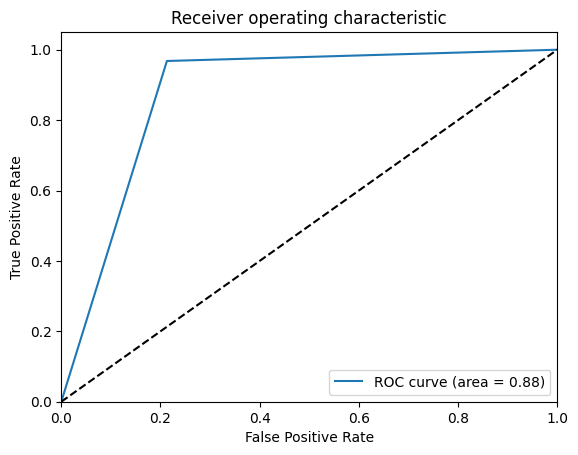

In [30]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [31]:
# Predict the status for a new sample
# 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
new_sample = np.array([[np.log(700), np.log(956), 10, np.log(2),1500,28.0,30202938,1670798778,'W']])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = dtc.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


In [32]:
# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)